In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import time
import matplotlib.patches as patches
import glob

import matplotlib.colors as mcolors

from netCDF4 import Dataset
from scipy import stats

from wrf import getvar

from matplotlib.animation import FuncAnimation



## estimate of pressure levels from the hybrid coordinate:
## lev0=975, 5=925, 8=850, 12=700, 17=500,  19=400, 21=300, 24=200, 29=100

# NOTE: SWDOWN is SWDNB, GLW is LWDNB. daily mean of (SWDOWN+GLW-(SWUPB+LWUPB)-(LH+HFX)) is very close to zero. 


### First, load the lats, lons, and levs used for plotting later.

In [2]:
### Plot the height vs. time sections of potential temperature
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
file = path+'Amazon561x721_ILdeforested/wrfout_d01_2015-11-01_00:00:00'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds1:
    lats=ds1['XLAT'][0,:,0]
    lons=ds1['XLONG'][0,0,:]
    lu1=ds1['LU_INDEX'][0,:,:]
    pb = ds1['PB'][0,:,:,:]

## Check whether LUindex is changed correctly

7.0

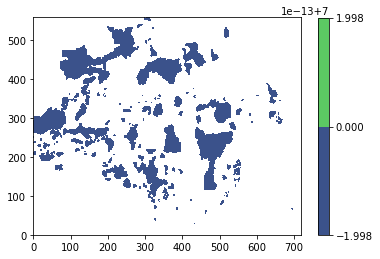

In [12]:
aa = lu1.where(lu1-lu0>0,np.nan)
plt.contourf(aa)
plt.colorbar()
np.nanmean(aa)

[Text(1, 5.0, 'forests'),
 Text(1, 7.0, 'shrublands'),
 Text(1, 9.0, 'savannas'),
 Text(1, 12.0, 'cropland'),
 Text(1, 16.0, 'water')]

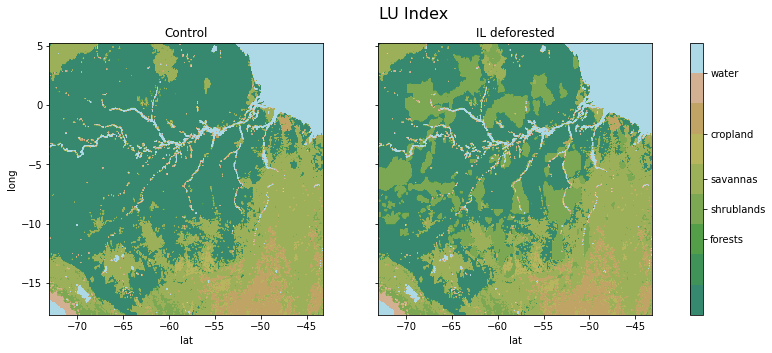

In [11]:
file0 = path+'Amazon561x721/energyflux_d01_2015-11-29_15:00:00'
with xarray.open_dataset(file0,decode_times=False,
                         mask_and_scale='True') as ds0:
    lu0=ds0['LU_INDEX'][0,:,:]

file1 = path+'Amazon561x721_ILgrassland/energyflux_d01_2015-11-29_15:00:00'
with xarray.open_dataset(file1,decode_times=False,
                         mask_and_scale='True') as ds1:
    lu1=ds1['LU_INDEX'][0,:,:]

### generate a new cmap
cmap = plt.get_cmap('gist_earth')
colors = cmap(np.linspace(0.3, 0.89, 100))
new_cmap = mcolors.LinearSegmentedColormap.from_list('test',colors)
new_cmap.set_over('lightblue')
############

fig,axes = plt.subplots(1,2,figsize=(13.5,5),sharex=True,sharey=True)
axes = axes.ravel()  
im=axes[0].contourf(lons,lats,lu0,cmap=new_cmap,vmax=16)  # ctrl luindex
axes[1].contourf(lons,lats,lu1,cmap=new_cmap,vmax=16)     # ILdeforeste luindex
axes[0].set_title('Control')
axes[1].set_title('IL deforested')
axes[0].set_xlabel('lat')
axes[1].set_xlabel('lat')
axes[0].set_ylabel('long')
plt.suptitle('LU Index',fontsize=16)
cbar = fig.colorbar(im,ax=axes, ticks = [5,7,9,12,16])
cbar.ax.set_yticklabels(['forests', 'shrublands', 'savannas','cropland','water'])  # vertically oriented colorbar

# 1. Energy budget

### Test surface albedo

## 1.1 mean of all time samples

In [96]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'post_processing/Amazon561x721/energy.2015.obs.NoahMP.multidaymean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'post_processing/Amazon561x721/energy.2015.ILgrassland.NoahMP.multidaymean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')

ok
ok


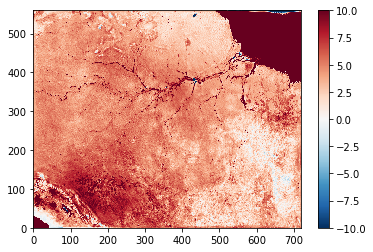

In [8]:
aa = ds0['SWDNB']+ds0['LWDNB']-ds0['LH']-ds0['HFX']-ds0['SWUPB']-ds0['LWUPB']
#aa = ds0['SWDNB']-ds0['SWUPB']-ds0['SWDOWN']
plt.pcolormesh(aa[:,:,:].mean(axis=0),cmap='RdBu_r',shading='auto',vmin=-10,vmax=10)
plt.colorbar()

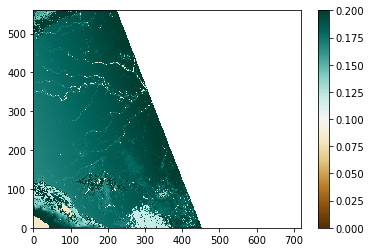

In [30]:
plt.pcolormesh(ds0['SWUPB'][0,:,:]/ds0['SWDNB'][0,:,:],vmin=0.,vmax=0.2,cmap='BrBG')
plt.colorbar()

### Energy in

ok
ok


<ipython-input-26-50059be4a307>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-26-50059be4a307>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-26-50059be4a307>:18: MatplotlibDeprecationWarning: shading='flat' w

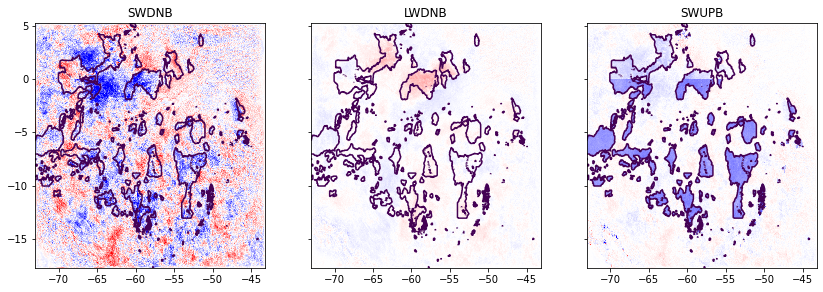

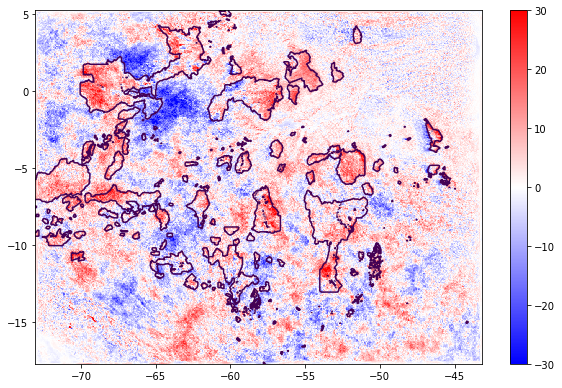

In [26]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon_NoahMP/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'Amazon_NoahMP_ILdeforested/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')
    
fig,axes = plt.subplots(1,3,figsize=(14,4.5),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['SWDNB','LWDNB','SWUPB','LH','HFX','LWUPB']

vmins=[-40,-100,-100,-3,-0.1,-40]
vmaxs=[40,100,100,3,0.1,40]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
                              vmin=-30,vmax=30
                             )
    #fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])
    
Gain0 = ds0['SWDNB']  - ds0['SWUPB'] + ds0['LWDNB']
Gain1 = ds1['SWDNB']  - ds1['SWUPB'] + ds1['LWDNB']

##### FIGURE 2
fig,axes = plt.subplots(1,1,figsize=(10,6.5),sharex=True,sharey=True)

im=axes.pcolormesh(lons,lats,Gain1.mean('Time')-Gain0.mean('Time'),vmin=-30,vmax=30,
                       cmap='bwr')
axes.contour(lons,lats,lu1-lu0,levels=[1,10])

fig.colorbar(im,ax=axes)

ok
ok


<ipython-input-27-debd6f139058>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-27-debd6f139058>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-27-debd6f139058>:18: MatplotlibDeprecationWarning: shading='flat' w

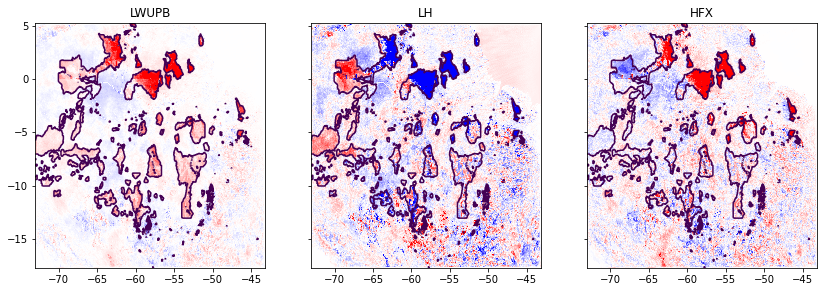

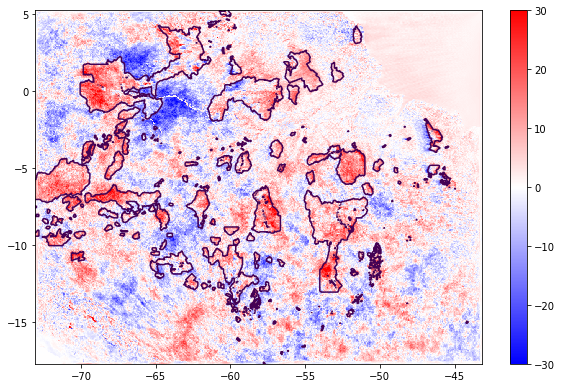

In [27]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon_NoahMP/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'Amazon_NoahMP_ILdeforested/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')
    
fig,axes = plt.subplots(1,3,figsize=(14,4.5),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LWUPB','LH','HFX']

vmins=[-40,-100,-100,-3,-0.1,-40]
vmaxs=[40,100,100,3,0.1,40]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
                              vmin=-30,vmax=30
                             )
    #fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])
    
## plot LOSS
Loss0 = ds0['HFX'] + ds0['LWUPB']+ ds0['LH']
Loss1 = ds1['HFX'] + ds1['LWUPB'] + ds1['LH']

##### FIGURE 2
fig,axes = plt.subplots(1,1,figsize=(10,6.5),sharex=True,sharey=True)

im=axes.pcolormesh(lons,lats,Loss1.mean('Time')-Loss0.mean('Time'),vmin=-30,vmax=30,
                       cmap='bwr')
axes.contour(lons,lats,lu1-lu0,levels=[1,10])

fig.colorbar(im,ax=axes)

ok
ok


<ipython-input-101-654b5eb95b0c>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-101-654b5eb95b0c>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-101-654b5eb95b0c>:18: MatplotlibDeprecationWarning: shading='flat

Text(0.5, 0.98, 'Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

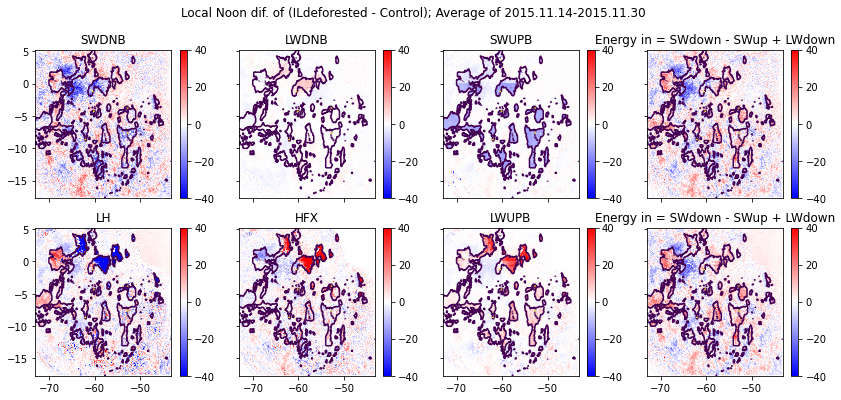

In [101]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon_NoahMP/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'Amazon_NoahMP_ILdeforested/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')
    
fig,axes = plt.subplots(1,3,figsize=(14,6),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['SWDNB','LWDNB','SWUPB','LH','HFX','LWUPB']

vmins=[-40,-100,-100,-3,-0.1,-40]
vmaxs=[40,100,100,3,0.1,40]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
                              vmin=-40,vmax=40
                             )
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])

#for ii in range(4,7):
    #img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-1]].mean('Time')-ds0[varname[ii-1]].mean('Time'),cmap='bwr',
                              vmin=-40,vmax=40
                             )
    #fig.colorbar(img,ax=axes[ii])
    #axes[ii].set_title(varname[ii-1])
    #axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])
    
Gain0 = ds0['SWDNB']  - ds0['SWUPB']
Gain1 = ds1['SWDNB']  - ds1['SWUPB']

## plot Rnet
Loss0 = ds0['HFX'] + ds0['LWUPB']+ ds0['LH']
Loss1 = ds1['HFX'] + ds1['LWUPB'] + ds1['LH']

img = axes[3].pcolormesh(lons,lats,Gain1.mean('Time')-Gain0.mean('Time'),vmin=vmins[5],vmax=vmaxs[5],
                       cmap='bwr')
fig.colorbar(img,ax=axes[3])
axes[3].set_title('Energy in = SWdown - SWup + LWdown')
axes[3].contour(lons,lats,lu1-lu0,levels=[1,10])    

img = axes[7].pcolormesh(lons,lats,Loss1.mean('Time')-Loss0.mean('Time'),vmin=vmins[5],vmax=vmaxs[5],
                       cmap='bwr')
fig.colorbar(img,ax=axes[7])
axes[7].set_title('Energy in = SWdown - SWup + LWdown')
axes[7].contour(lons,lats,lu1-lu0,levels=[1,10])    

plt.suptitle('Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

# How about cropland?

ok
ok


<ipython-input-7-a290fa61294a>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-7-a290fa61294a>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-7-a290fa61294a>:18: MatplotlibDeprecationWarning: shading='flat' when

Text(0.5, 0.98, 'Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

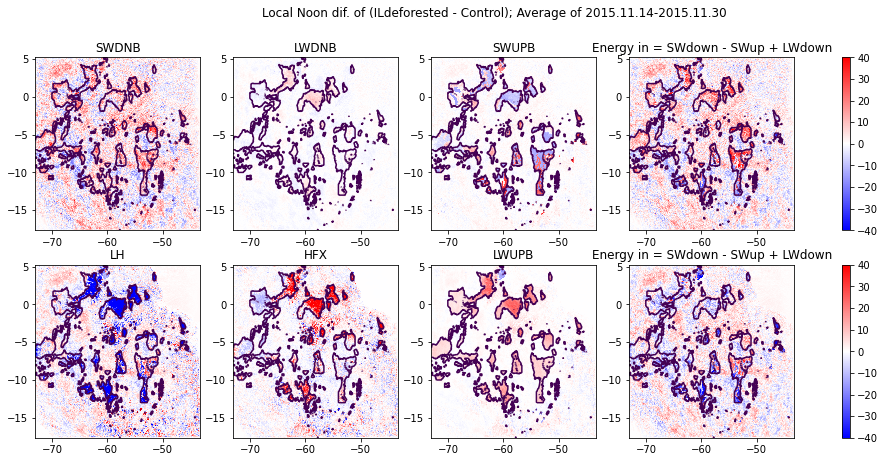

In [7]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon561x721/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'Amazon561x721_ILdeforested/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')
    
fig,axes = plt.subplots(2,4,figsize=(17,7))
axes = axes.ravel()  
varname = ['SWDNB','LWDNB','SWUPB','LH','HFX','LWUPB']

vmins=[-40,-100,-100,-3,-0.1,-40]
vmaxs=[40,100,100,3,0.1,40]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
                              vmin=-40,vmax=40
                             )
    #fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])

for ii in range(4,7):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-1]].mean('Time')-ds0[varname[ii-1]].mean('Time'),cmap='bwr',
                              vmin=-40,vmax=40
                             )
    #fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii-1])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])

    
Gain0 = ds0['SWDNB']  - ds0['SWUPB']
Gain1 = ds1['SWDNB']  - ds1['SWUPB']

## plot Rnet
Loss0 = ds0['HFX'] + ds0['LWUPB']+ ds0['LH']
Loss1 = ds1['HFX'] + ds1['LWUPB'] + ds1['LH']

img = axes[3].pcolormesh(lons,lats,Gain1.mean('Time')-Gain0.mean('Time'),vmin=vmins[5],vmax=vmaxs[5],
                       cmap='bwr')
fig.colorbar(img,ax=axes[:4])
axes[3].set_title('Energy in = SWdown - SWup + LWdown')
axes[3].contour(lons,lats,lu1-lu0,levels=[1,10])    

img = axes[7].pcolormesh(lons,lats,Loss1.mean('Time')-Loss0.mean('Time'),vmin=vmins[5],vmax=vmaxs[5],
                       cmap='bwr')
fig.colorbar(img,ax=axes[4:8])
axes[7].set_title('Energy in = SWdown - SWup + LWdown')
axes[7].contour(lons,lats,lu1-lu0,levels=[1,10])    

plt.suptitle('Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

ok
ok


<ipython-input-7-a290fa61294a>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-7-a290fa61294a>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-7-a290fa61294a>:18: MatplotlibDeprecationWarning: shading='flat' when

Text(0.5, 0.98, 'Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

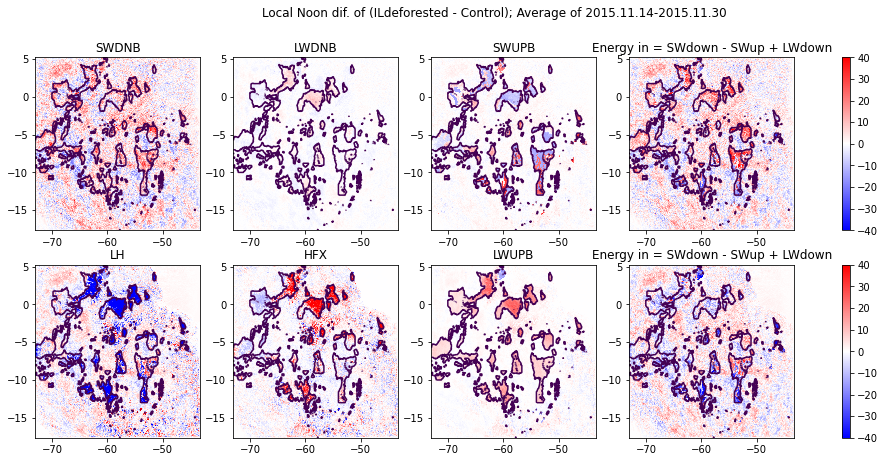

In [7]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon561x721/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')

with xarray.open_dataset(path+'Amazon561x721_ILdeforested/energyflux.day1_29.mean.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
                         print('ok')
    
fig,axes = plt.subplots(2,4,figsize=(17,7))
axes = axes.ravel()  
varname = ['SWDNB','LWDNB','SWUPB','LH','HFX','LWUPB']

vmins=[-40,-100,-100,-3,-0.1,-40]
vmaxs=[40,100,100,3,0.1,40]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(3):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
                              vmin=-40,vmax=40
                             )
    #fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])

for ii in range(4,7):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii-1]].mean('Time')-ds0[varname[ii-1]].mean('Time'),cmap='bwr',
                              vmin=-40,vmax=40
                             )
    #fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii-1])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])

    
Gain0 = ds0['SWDNB']  - ds0['SWUPB']
Gain1 = ds1['SWDNB']  - ds1['SWUPB']

## plot Rnet
Loss0 = ds0['HFX'] + ds0['LWUPB']+ ds0['LH']
Loss1 = ds1['HFX'] + ds1['LWUPB'] + ds1['LH']

img = axes[3].pcolormesh(lons,lats,Gain1.mean('Time')-Gain0.mean('Time'),vmin=vmins[5],vmax=vmaxs[5],
                       cmap='bwr')
fig.colorbar(img,ax=axes[:4])
axes[3].set_title('Energy in = SWdown - SWup + LWdown')
axes[3].contour(lons,lats,lu1-lu0,levels=[1,10])    

img = axes[7].pcolormesh(lons,lats,Loss1.mean('Time')-Loss0.mean('Time'),vmin=vmins[5],vmax=vmaxs[5],
                       cmap='bwr')
fig.colorbar(img,ax=axes[4:8])
axes[7].set_title('Energy in = SWdown - SWup + LWdown')
axes[7].contour(lons,lats,lu1-lu0,levels=[1,10])    

plt.suptitle('Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

## Change in SWDNB

<ipython-input-106-f5745da86e5b>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-106-f5745da86e5b>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
<ipython-input-106-f5745da86e5b>:16: MatplotlibDeprecationWarning: shading='flat' 

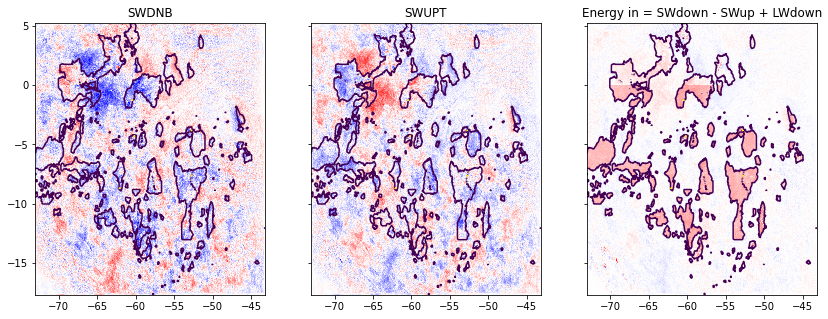

In [106]:
Abs0 = ds0['SWDNT']  - ds0['SWUPT'] - ds0['SWDNB']
Abs1 = ds1['SWDNT']  - ds1['SWUPT'] - ds1['SWDNB']

fig,axes = plt.subplots(1,3,figsize=(14,5),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['SWDNB','SWUPT']

for ii in range(2):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]].mean('Time')-ds0[varname[ii]].mean('Time'),cmap='bwr',
                              vmin=-40,vmax=40
                             )
    #fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])

img = axes[2].pcolormesh(lons,lats,Abs1.mean('Time')-Abs0.mean('Time'),vmin=-40,vmax=40,
                       cmap='bwr')
#fig.colorbar(img,ax=axes[2])
axes[2].set_title('Energy in = SWdown - SWup + LWdown')
axes[2].contour(lons,lats,lu1-lu0,levels=[1,10])    

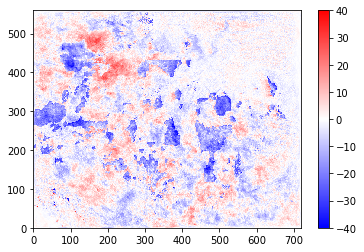

In [114]:
#aa = ds0['SWUPT']  - ds1['SWUPT'] - (ds1['SWDNB']-ds0['SWDNB'])
aa = ds1['SWUPT']  - ds0['SWUPT'] - (Abs1-Abs0)

plt.pcolormesh(aa[0,:,:],cmap='bwr',vmin=-40,vmax=40)
plt.colorbar()

In [ ]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
file = path+'post_processing/Amazon561x721/energy.2015.ILdeforested.day1_5.nc'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')

with xarray.open_dataset(path+'post_processing/Amazon561x721/energy.2015.obs.day1_5.nc',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
    
varname = ['SWUPT','SWDNT','SWUPB','SWDNB','SWDNBC','LWUPT','LWUPTC','LWUPB','LWUPBC','LWDNB','LWDNBC']
dif_lu = lu1-lu0
for ii in range(11):
    
    globals()[var0_IL_name] = var0.where(dif_lu>0,np.nan).mean(('south_north','west_east'))
    globals()[var0_out_name] = var0.where(dif_lu==0,np.nan).mean(('south_north','west_east'))
    globals()[var1_IL_name] = var1.where(dif_lu>0,np.nan).mean(('south_north','west_east'))
    globals()[var1_out_name] = var1.where(dif_lu==0,np.nan).mean(('south_north','west_east'))

ok


<ipython-input-21-3a263e57e78f>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds0[varname[ii]][0,:,:],cmap='RdBu_r'
<ipython-input-21-3a263e57e78f>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[5].pcolormesh(lons,lats,net[0,:,:],


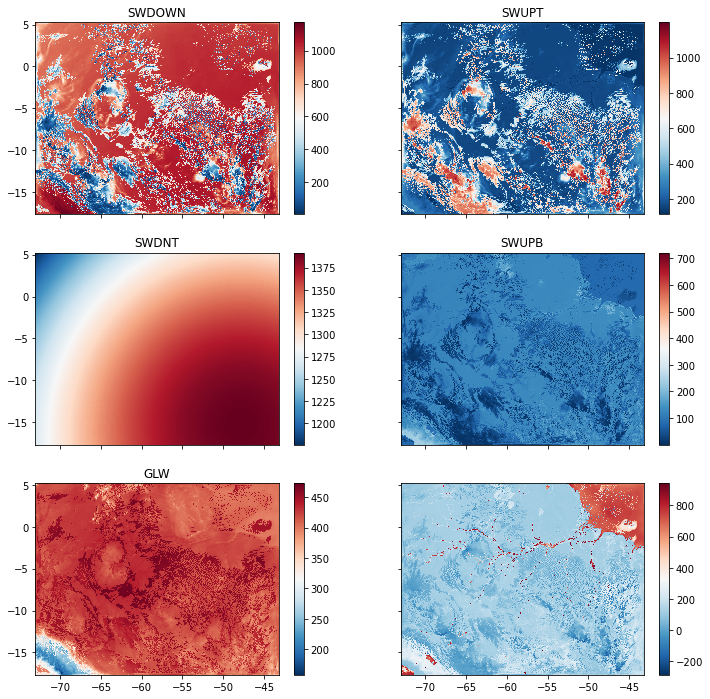

In [21]:
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
with xarray.open_dataset(path+'Amazon_NoahMP/energyflux_d01_2015-11-01_15:00:00',decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')


fig,axes = plt.subplots(3,2,figsize=(12,12),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['SWDOWN','SWUPT','SWDNT','SWUPB','GLW']

vmins=[-40,-100,-100,-3,-0.1,-100]
vmaxs=[40,100,100,3,0.1,100]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(5):
    img = axes[ii].pcolormesh(lons,lats,ds0[varname[ii]][0,:,:],cmap='RdBu_r'
                              #vmin=vmins[ii],vmax=vmaxs[ii]
                             )
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    #axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])
net = ds0['SWDOWN']+ds0['GLW']-ds0['LH']-ds0['HFX']-ds0['SWUPB']-ds0['LWUPB']
img = axes[5].pcolormesh(lons,lats,net[0,:,:],
                       cmap='RdBu_r')

fig.colorbar(img,ax=axes[5])

<ipython-input-73-d09323d916f4>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]][TIME,:,:]-ds0[varname[ii]][TIME,:,:],cmap='bwr',
<ipython-input-73-d09323d916f4>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]][TIME,:,:]-ds0[varname[ii]][TIME,:,:],cmap='bwr',
<ipython-input-73-d09323d916f4>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y 

Text(0.5, 0.98, 'Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

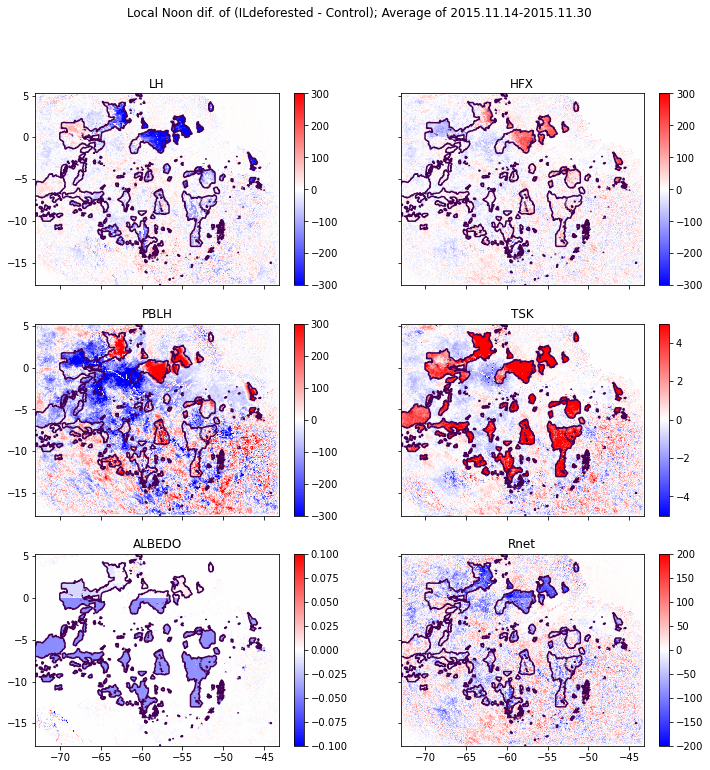

In [73]:
TIME=15
fig,axes = plt.subplots(3,2,figsize=(12,12),sharex=True,sharey=True)
axes = axes.ravel()  
varname = ['LH','HFX','PBLH','TSK','ALBEDO']

vmins=[-300,-300,-300,-5,-0.1,-200]
vmaxs=[300,300,300,5,0.1,200]
cmaps=['PiYG','PiYG','bwr','coolwarm','bwr','PiYG']
for ii in range(5):
    img = axes[ii].pcolormesh(lons,lats,ds1[varname[ii]][TIME,:,:]-ds0[varname[ii]][TIME,:,:],cmap='bwr',
                             vmin=vmins[ii],vmax=vmaxs[ii])
    fig.colorbar(img,ax=axes[ii])
    axes[ii].set_title(varname[ii])
    axes[ii].contour(lons,lats,lu1-lu0,levels=[1,10])
    
## plot Rnet
Rnet0 = ds0['LH'] + ds0['HFX']
Rnet1 = ds1['LH'] + ds1['HFX']

img = axes[5].pcolormesh(lons,lats,Rnet1[TIME,:,:]-Rnet0[TIME,:,:],vmin=vmins[5],vmax=vmaxs[5],
                       cmap='bwr')

fig.colorbar(img,ax=axes[5])
axes[5].set_title('Rnet')
axes[5].contour(lons,lats,lu1-lu0,levels=[1,10])    

plt.suptitle('Local Noon dif. of (ILdeforested - Control); Average of 2015.11.14-2015.11.30')

## Diurnal cycle

In [53]:
dif = ds1[varname[ii]] - ds0[varname[ii]]
dif_lu = lu1-lu0
dif_forests = dif.where(dif_lu>0)
diurnal_north = dif_forests[:,380:,200:600].mean(('south_north','west_east'))
diurnal_west = dif_forests[0,100:,:200].mean(('south_north','west_east'))
#plt.contourf(dif_forests)


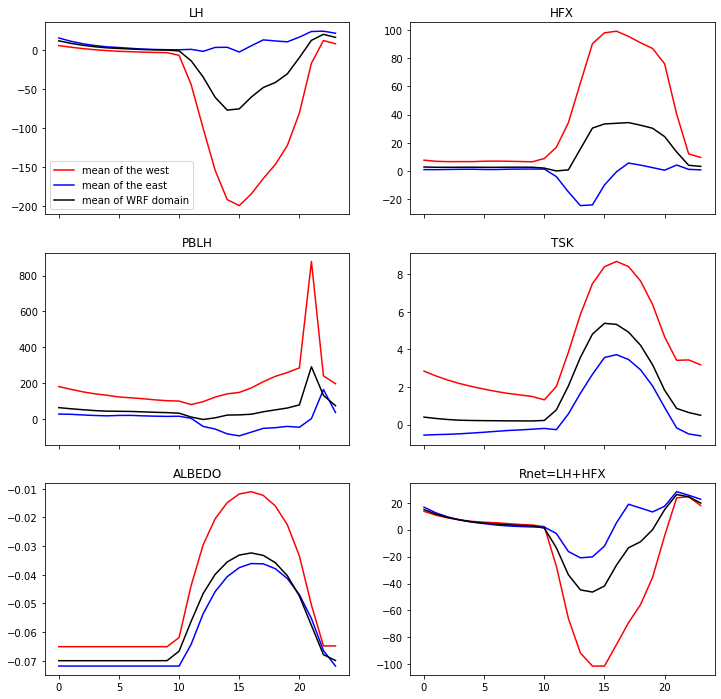

In [70]:
fig,axes = plt.subplots(3,2,figsize=(12,12),sharex=True)
axes = axes.ravel()  
varname = ['LH','HFX','PBLH','TSK','ALBEDO','Rnet=LH+HFX']
for ii in range(5):
    dif = ds1[varname[ii]] - ds0[varname[ii]]
    dif_lu = lu1-lu0
    dif_forests = dif.where(dif_lu>0)
    diurnal_north = dif_forests[:,380:,200:600].mean(('south_north','west_east'))
    diurnal_west = dif_forests[:,100:,:200].mean(('south_north','west_east'))
    diurnal_all = dif_forests.mean(('south_north','west_east'))

    
    axes[ii].plot(range(24),diurnal_north,'-r',label='mean of the west')
    axes[ii].plot(range(24),diurnal_west,'-b',label='mean of the east')
    axes[ii].plot(range(24),diurnal_all,'-k',label='mean of WRF domain')

    axes[ii].set_title(varname[ii])
    
axes[0].legend()
   
## plot Rnet
dif_Rnet = ds1['LH'] + ds1['HFX'] - (ds0['LH'] + ds0['HFX'])
dif_forests = dif_Rnet.where(dif_lu>0)
diurnal_north = dif_forests[:,380:,200:600].mean(('south_north','west_east'))
diurnal_west = dif_forests[:,100:,:200].mean(('south_north','west_east'))
diurnal_all = dif_forests.mean(('south_north','west_east'))
axes[5].plot(range(24),diurnal_north,'-r')
axes[5].plot(range(24),diurnal_west,'-b')
axes[5].plot(range(24),diurnal_all,'-k')
axes[5].set_title(varname[5])



## Test on surface albedo

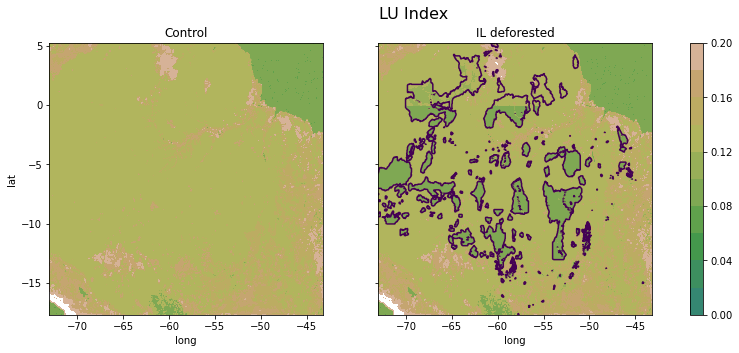

In [34]:
file0 = path+'Amazon_NoahMP/energyflux_d01_2015-11-20_15:00:00'
with xarray.open_dataset(file0,decode_times=False,
                         mask_and_scale='True') as ds0:
    lu0=ds0['LU_INDEX'][0,:,:]

file1 = path+'Amazon_NoahMP_ILdeforested/energyflux_d01_2015-11-20_15:00:00'
with xarray.open_dataset(file1,decode_times=False,
                         mask_and_scale='True') as ds1:
    lu1=ds1['LU_INDEX'][0,:,:]


fig,axes = plt.subplots(1,2,figsize=(13.5,5),sharex=True,sharey=True)
axes = axes.ravel()  
#axes[0].pcolormesh(ds0['SWUPB'][0,:,:]/ds0['SWDNB'][0,:,:],vmin=0.,vmax=0.2,cmap=new_cmap)  # ctrl luindex
#im=axes[1].pcolormesh(ds1['SWUPB'][0,:,:]/ds1['SWDNB'][0,:,:],vmin=0.,vmax=0.2,cmap=new_cmap)# ILdeforeste luindex
axes[0].contourf(lons,lats,ds0['SWUPB'][0,:,:]/ds0['SWDNB'][0,:,:],levels=np.arange(0.0,0.201,0.02),cmap=new_cmap)  # ctrl luindex
im=axes[1].contourf(lons,lats,ds1['SWUPB'][0,:,:]/ds1['SWDNB'][0,:,:],levels=np.arange(0.0,0.201,0.02),cmap=new_cmap)# ILdeforeste luindex
#axes[0].contour(lons,lats,lu1-lu0,levels=[1,10])    
axes[1].contour(lons,lats,lu1-lu0,levels=[1,10])    

axes[0].set_title('Control')
axes[1].set_title('IL deforested')
axes[0].set_xlabel('long')
axes[1].set_xlabel('long')
axes[0].set_ylabel('lat')
plt.suptitle('LU Index',fontsize=16)
cbar = fig.colorbar(im,ax=axes)
#cbar.ax.set_yticklabels(['forests', 'shrublands', 'savannas','cropland','water'])  # vertically oriented colorbar